# Toy data generation

In [1]:
import simdata
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import ConvexHull
from matplotlib.patches import Polygon

%matplotlib inline

No module named 'jsonpickle' : json dump and load won't work


In [2]:
def plot_twoclass(ax, X, Y):
    """Plot a 2D binary classification dataset"""
    pos_idx = Y == 1
    neg_idx = Y == -1
    ax.plot(X[0, pos_idx], X[1, pos_idx], 'bo')
    ax.plot(X[0, neg_idx], X[1, neg_idx], 'rx')

## Linear separable and non-separable

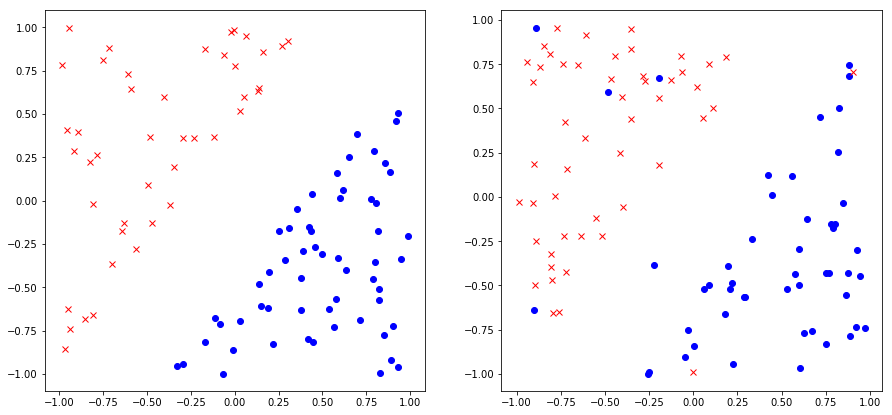

In [3]:
np.random.seed(12345)
fig = plt.figure(figsize=(15,7))
metadata, X, Y = simdata.linear_separation(100, 2, 0)
ax = fig.add_subplot(121)
plot_twoclass(ax, X, Y)
metadata, X, Y = simdata.linear_nonseparable(100, 2, 0)
ax = fig.add_subplot(122)
plot_twoclass(ax, X, Y)
plt.savefig('linear-separation.pdf')

## Convex hull

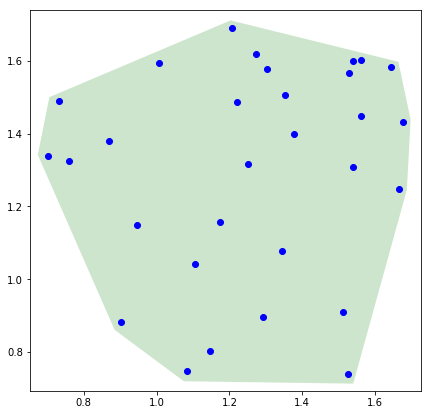

In [4]:
def plot_convex_hull(ax, X, marker='bo', facecolor='green'):
    hull = ConvexHull(X)

    ax.plot(X[:,0], X[:,1], marker)
    cent = np.mean(X, 0)
    pts = []
    for pt in X[hull.simplices]:
        pts.append(pt[0].tolist())
        pts.append(pt[1].tolist())

    pts.sort(key=lambda p: np.arctan2(p[1] - cent[1],
                                    p[0] - cent[0]))
    pts = pts[0::2]  # Deleting duplicates
    pts.insert(len(pts), pts[0])
    k = 1.05
    poly = Polygon(k*(np.array(pts)- cent) + cent,
                   facecolor=facecolor, alpha=0.2)
    poly.set_capstyle('round')
    ax.add_patch(poly)
    
points = np.random.rand(30, 2)+0.7   # 30 random points in 2-D
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
plot_convex_hull(ax, points)
plt.savefig('convex_hull.pdf')

In [5]:
def plot_two_hull(ax, X, Y):
    """Plot data and the convex hull for a binary classification dataset."""
    pos_idx = Y == 1
    neg_idx = Y == -1
    pos = X[:, pos_idx].T
    neg = X[:, neg_idx].T
    plot_convex_hull(ax, pos, 'bo', facecolor='blue')
    plot_convex_hull(ax, neg, 'rx', facecolor='red')

cloudgen(40,60,2,0,0.50)


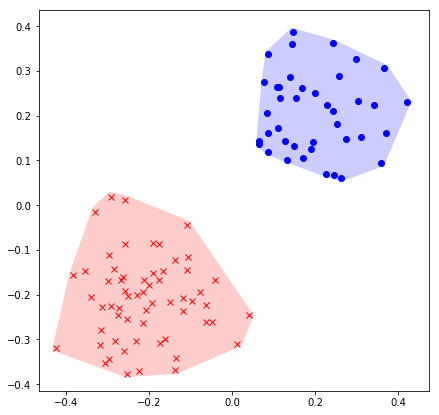

In [6]:
metadata, data, label = simdata.cloudgen(100, 2, 0, 0.4, 0.5)
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
plot_two_hull(ax, data, label)
plt.savefig('two_convex_hulls.pdf')